In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
# Training e test set
training_set = pd.read_csv('../data/campaign-data-training-regression.csv')
testing_set = pd.read_csv('../data/campaign-data-testing-regression.csv')
testing_set = testing_set.loc[:, testing_set.columns.isin(training_set.columns)]

# Unione di training e test set
dataset = pd.concat([training_set, testing_set], ignore_index = True)

In [3]:
# Feature e target del dataset
feature_train = dataset.drop('score', axis = 1).to_numpy()
target_train = dataset['score'].to_numpy()

In [4]:
# Fitting del regressore con training set
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 19)
rf_model.fit(feature_train, target_train)

RandomForestRegressor(random_state=19)

In [5]:
# Feature importance
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index = dataset.drop('score', axis = 1).columns).sort_values(ascending = False)
forest_importances.head(15)

impressions_page_length_1        0.415256
impressions_page_length_2        0.209389
impressions_page_length_3        0.157000
impressions_page_length_4        0.142487
impressions_workday_afternoon    0.012383
impressions_workday_evening      0.009723
impressions_workday_morning      0.008806
impressions_weekend_afternoon    0.007730
impressions_workday_night        0.006407
impressions_weekend_morning      0.004648
impressions_weekend_night        0.004370
impressions_weekend_evening      0.003825
hobbiesandinterests              0.002473
browser_D                        0.001795
technologyandcomputing           0.001767
dtype: float64

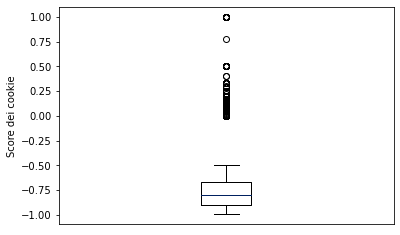

count    48413.000000
mean        -0.708287
std          0.268515
min         -0.996000
25%         -0.900000
50%         -0.800000
75%         -0.667000
max          1.000000
Name: score, dtype: float64

In [9]:
# Grafico con la distribuzione degli score
fig, ax = plt.subplots()
ax.set_ylabel('Score dei cookie')
boxplot_props = dict(color='#002060')
plt.boxplot(dataset['score'], medianprops=boxplot_props)
plt.xticks([])
plt.show()

# Dati sulla distribuzione degli score
dataset['score'].describe()

In [10]:
# Dataset filtrato con raggruppamento per caratteristiche comuni
filtered_dataset = dataset[dataset['score'] > -0.5]
filtered_dataset.groupby(filtered_dataset.columns[12:36].to_list()).size().sort_values(ascending=False)